# Business Case N° 2

## What are the number of title per genre?

#### Required imports

In [1]:
from base import db, getAnswer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")

#### Fetch and Wrangling data

In [2]:
# Consulta para buscar a quantidade de filmes por genero
sql = "SELECT genres, COUNT(*) as count FROM titles WHERE type = 'movie' GROUP BY genres"

# Função para executar a consulta no banco de dados
answer = getAnswer(db, sql)

# Transformando os dados de generos em string com lower case
answer['genres'] = answer['genres'].str.lower().values

tmp = answer['genres'].dropna()  # Eliminando linhas com valores nulos

In [3]:
pattern = '(?u)\\b[\\w-]+\\b'  # RE para separar as strings com mais de um genero

vector = CountVectorizer(token_pattern=pattern, analyzer='word').fit(tmp)  # Separando as strings e preparando o vetor one-hot encoded

# Bag of Words (Matriz)
bag_genres = vector.transform(tmp)

unique_genres = vector.get_feature_names()

# Transformando o vetor one-hot encoded
genres = pd.DataFrame(bag_genres.todense(), columns=unique_genres, index=tmp.index)

In [ ]:
genres.info()

In [5]:
genres = genres.drop(columns='n', axis=0)  # Eliminando coluna indesejada, gerada na transformação dos dados

In [6]:
# Calculando a porcentagem de cada genero
genres_percent = round((pd.Series(genres.sum()).sort_values(ascending=False) / genres.shape[0]) * 100, 2)

#### Result Plot

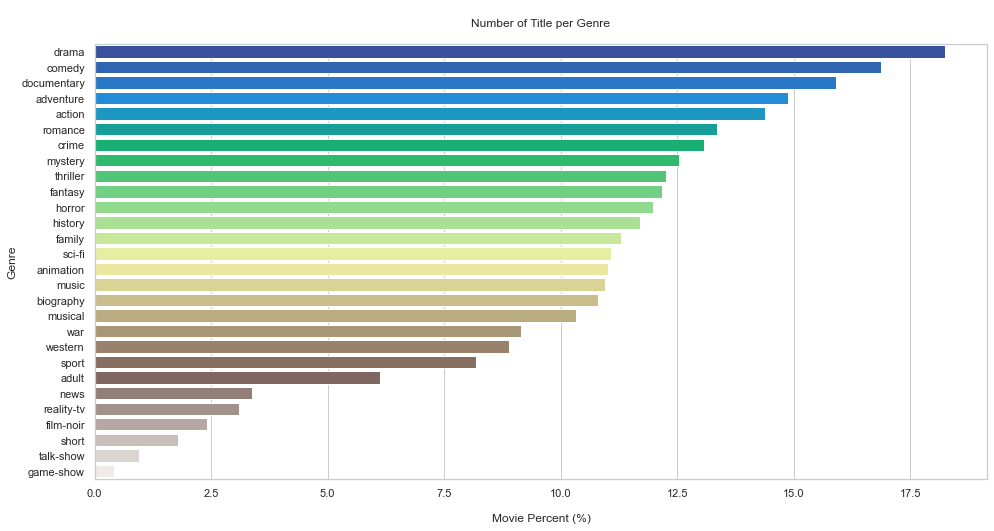

In [7]:
plt.figure(figsize=(16, 8))
sns.barplot(x=genres_percent.values, y=genres_percent.index, orient='h', palette='terrain')
plt.ylabel('Genre')
plt.xlabel('\nMovie Percent (%)')
plt.title('\nNumber of Title per Genre\n')
plt.show()